DWI MIFTAHUSSALAMAH

211063117001


Gestalt Principles in Visual Preception

# **Load Dataset**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
shapes = pd.read_csv('shapes_dataset.csv')

In [17]:
shapes.head()

,shape,color,x,y,size
0,circle,red,1,1,0.5
1,square,blue,2,2,0.8
2,triangle,green,3,1,0.6
3,circle,yellow,4,3,0.7
4,square,red,5,2,0.9


# **Task 1: Similarity**

**Objective**: Create a scatter plot where shapes are grouped based on their
color or type.

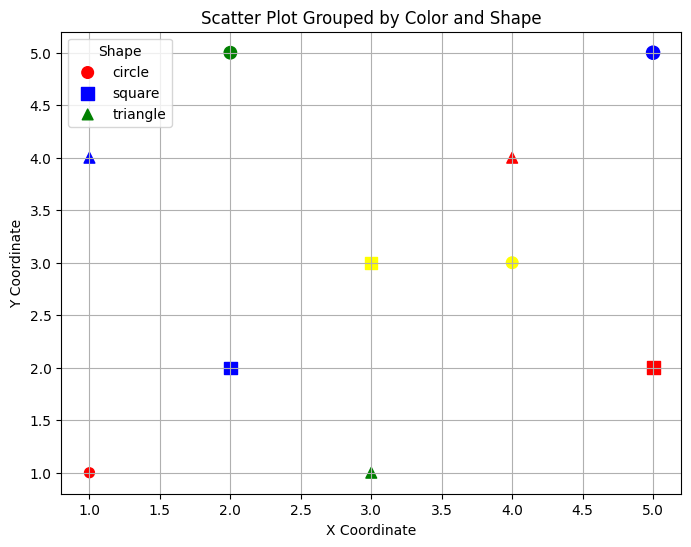

In [18]:
# Define markers for each shape
markers = {'circle': 'o', 'square': 's', 'triangle': '^'}

# Create the scatter plot
plt.figure(figsize=(8, 6))
for shape in shapes['shape'].unique():
    subset = shapes[shapes['shape'] == shape]
    plt.scatter(
        subset['x'], subset['y'],
        s=subset['size'] * 100,  # Scale size for better visibility
        c=subset['color'],
        label=shape,
        marker=markers[shape]
    )

# Add legend and labels
plt.legend(title="Shape")
plt.title("Scatter Plot Grouped by Color and Shape")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()

#  **Task 2: Proximity**

**Objective**: Demonstrate the principle of proximity by clustering shapes

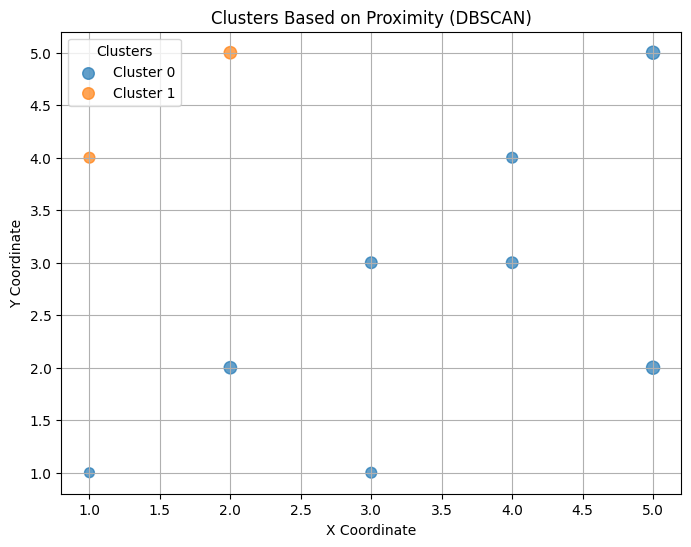

In [19]:
from sklearn.cluster import DBSCAN

# Prepare data for clustering
coordinates = shapes[['x', 'y']].values

# Apply DBSCAN for clustering
dbscan = DBSCAN(eps=1.5, min_samples=2)  # Parameters can be adjusted as needed
clusters = dbscan.fit_predict(coordinates)

# Add cluster labels to the dataset
shapes['cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster_label in np.unique(clusters):
    subset = shapes[shapes['cluster'] == cluster_label]
    plt.scatter(
        subset['x'], subset['y'],
        s=subset['size'] * 100,
        label=f"Cluster {cluster_label}" if cluster_label != -1 else "Noise",
        alpha=0.7
    )

# Add legend and labels
plt.legend(title="Clusters")
plt.title("Clusters Based on Proximity (DBSCAN)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()


#  **Task 3: Closure**

**Objective**: Create an incomplete shape that visually suggests a complete
figure

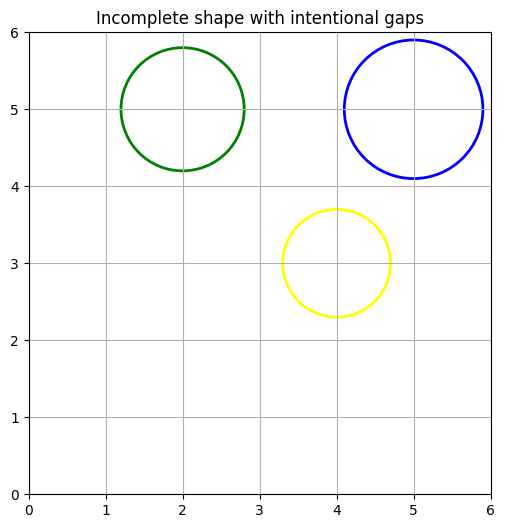

In [20]:
# Select shapes to form a rough circle with intentional gaps
closure_shapes = shapes[(shapes['shape'] == 'circle') & (shapes['size'] > 0.5)]

# Plot the shapes with intentional gaps
plt.figure(figsize=(6, 6))
for _, row in closure_shapes.iterrows():
    circle = plt.Circle((row['x'], row['y']), row['size'], color=row['color'], fill=False, linewidth=2)
    plt.gca().add_artist(circle)

# Intentionally leave gaps in the circle to test closure perception
plt.title("Incomplete shape with intentional gaps")
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()


# **Task 4: Continuity**

**Objective**: Illustrate how the human eye follows continuous lines

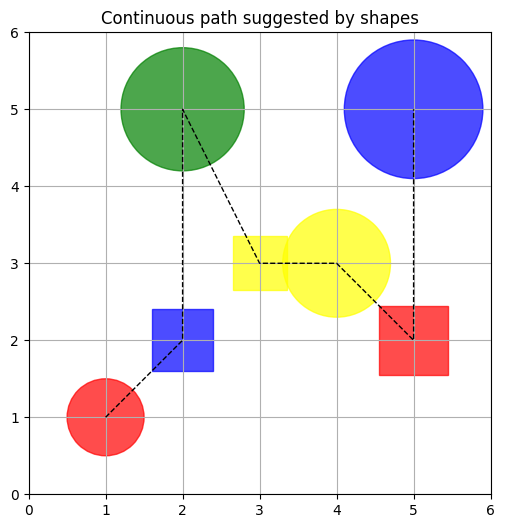

In [21]:
# Select shapes to form a smooth path (e.g., based on x, y positions)
continuity_shapes = shapes[shapes['shape'].isin(['circle', 'square'])].sort_values(by=['x', 'y'])

# Plot the shapes in a way that suggests a continuous curve or line
plt.figure(figsize=(6, 6))
for _, row in continuity_shapes.iterrows():
    if row['shape'] == 'circle':
        circle = plt.Circle((row['x'], row['y']), row['size'], color=row['color'], alpha=0.7)
        plt.gca().add_artist(circle)
    elif row['shape'] == 'square':
        square = plt.Rectangle((row['x'] - row['size']/2, row['y'] - row['size']/2),
                                row['size'], row['size'], color=row['color'], alpha=0.7)
        plt.gca().add_artist(square)

# Connect the shapes with a smooth path
plt.plot(continuity_shapes['x'], continuity_shapes['y'], linestyle='--', color='black', linewidth=1)

plt.title("Continuous path suggested by shapes")
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()
